<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

## Continuous Probability Distributions

## LEARNING OBJECTIVES
By the end of this lesson, students should be able to:
- Give examples of the following distributions: Continuous Uniform, Exponential, Normal, Beta.
- Describe why the Normal distribution is seen everywhere.
- State the Central Limit Theorem.

## Recap


**Check**: What is a distribution?
<details><summary>Answer</summary>

- A distribution is the set of all values of a variable and how frequently we observe each value.
</details>

**Check**: What is the difference between a continuous random variable and discrete random variable?
<details><summary>Answer</summary>
    
- A continuous random variable takes on an uncountably infinite number of values. 
- A discrete random variable takes on a countable number of values.
</details>

**(BONUS) Check**: Describe these distributions:
- Discrete Uniform
- Bernoulli
- Binomial
- Poisson

<details><summary>Answer</summary>

- A discrete uniform distribution takes on a range of values that are all equally likely. 
    -  Example: the value from rolling one die.
- A Bernoulli distribution has two outcomes, usually called "success" and "failure." The only parameter is the probability of success $p$.
    - Example: the number of heads flipped when flipping one coin.
- A Binomial distribution counts the number of successes we observe in a fixed number of $n$ independent Bernoulli trials. 
    - Example: the number of heads flipped when flipping fifty coins.
- A Poisson distribution counts the number of successes we observe in a fixed ~amount of time~ **_INTERVAL_**.
    - Example: the number of cars that enter a toll road in an hour.
    - Example: the number of people in a U.S. household.
</details>

![](images/box-quote.jpg)

Earlier, we spoke about the **discrete uniform** distribution, where each outcome is equally likely.

This is the **probability mass function** of a discrete uniform.
- Remember that a probability mass function shows us the probability that our random variable takes on a specific value.

<img src="./images/discrete_uniform_pmf.png" alt="discrete uniform pmf" width="700"/>

This is the **cumulative distribution function** of a discrete uniform.
- Remember that a cumulative distribution function shows us the probability that our random variable takes on any value less than or equal to a specific value.

<img src="./images/discrete_uniform_cdf.png" alt="discrete uniform cdf" width="700"/>

$$
\begin{eqnarray*}
\text{probability mass function}: P(X = x) \\
\text{cumulative distribution function}: P(X \le x)
\end{eqnarray*}
$$

---

# Continuous Distributions!

One small notation difference: when dealing with continuous distributions, we use **probability density functions**, not probability mass functions.
- This has to do with how probability is defined.

## The Continuous Uniform distribution

When dealing with an uncountably infinite range of outcomes, we might use a **continuous uniform** instead of a discrete uniform distribution.

Parameters of the distribution:

- $a$, the minimum value of the distribution.
- $b$, the maximum value of the distribution.

#### Continuous Uniform pdf

The Continuous Uniform pdf is defined as:

$$ f(x) = \frac{1}{b-a} $$

One of the most common examples of this is where we want to randomly sample a number between 0 and 1.
- This is incredibly valuable if we want to model some complex process through random simulations.

**Check:**
<details><summary> Since we know what a discrete uniform pmf looks like, what do you expect the shape of a continuous uniform pdf to look like?</summary>
    
- [Head to this site!](http://students.brown.edu/seeing-theory/probability-distributions/index.html#section2)
</details>

## The Exponential distribution

When do we use the Exponential distribution?
- We commonly use the Exponential distribution when we are interested in modeling the **amount of time until a success occurs**.

Since time is continuous, the exponential distribution is a continuous distribution.

Parameters of the distribution:

- $\beta$, the average time to an event.

<details><summary>Based on historical data, we see an average of 10 buses per hour. From this, how long do you think it will take on average for a new bus to arrive?</summary>

- 6 minutes.

$$
\begin{eqnarray*}
\frac{\text{10 buses}}{\text{1 hour}} = \frac{\text{10 buses}}{\text{60 minutes}} = \frac{\text{1 bus}}{\text{6 minutes}}
\end{eqnarray*}
$$
</details>

#### Exponential pdf

Let $X \sim \text{Exp}(\beta)$.

The exponential pdf is defined as:

$$ f(x) = \frac{1}{\beta}  e^{-x/\beta} $$

In this case, $x$ is the time elapsed.

In [1]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# A short function which plots a random variable's pdf (or cdf!) from
# limits lb (lower bound) to ub (upper bound)
def plot_distn(rv, lb, ub, kind="pdf"):
    xs = np.linspace(lb, ub, 1000)
    
    if kind == "pdf":
        ys = rv.pdf(xs)
    elif kind == "cdf":
        ys = rv.cdf(xs)
        
    plt.figure(figsize=(14, 5))
    plt.plot(xs, ys, linewidth=3, color="navy")

In [3]:
# Thanks to scipy, we can have a sort of random variable object
x = stats.expon(scale = 6) #scale = beta

Text(0, 0.5, 'probability of bus arriving at in that minute')

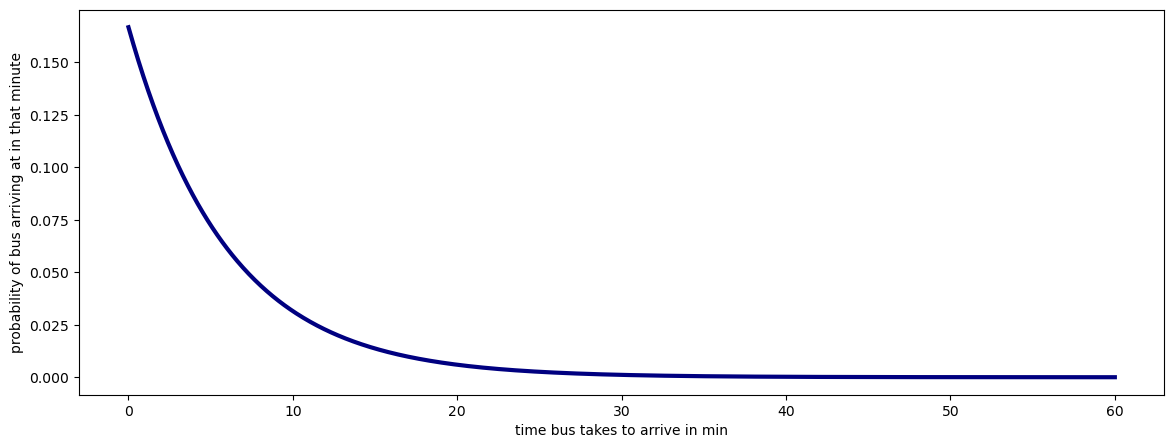

In [5]:
# They have lots of interesting methods
plot_distn(x,0,60)
plt.xlabel("time bus takes to arrive in min")
plt.ylabel("probability of bus arriving at in that minute")

In [7]:
x.mean() #expected is 6, integrate the area under graph, it should give back 6

6.0

It's generally easier to use the cumulative distribution function to find specific probabilities. (e.g. "What is the probability that the next bus takes at least 5 but less than 10 minutes to show up?")

#### Exponential cdf

Let $X \sim \text{Exp}(\beta)$.

The cumulative density function is:

$$ F(x) = P(X \le x) = 1 -  e^{-x/\beta} $$

With the same example, our cumulative distribution function looks like:

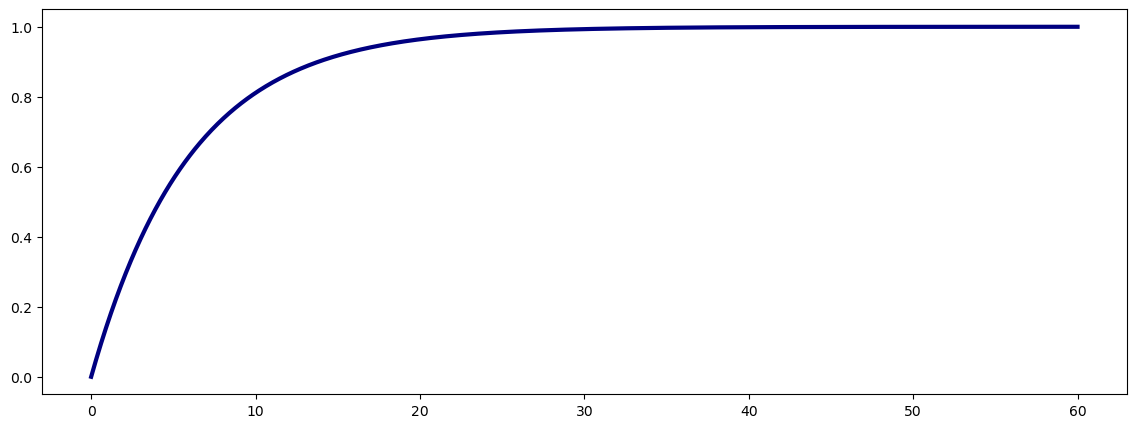

In [8]:
plot_distn(x, 0, 60, kind="cdf")

In [10]:
# What is the probability that our next bus shows
# up in 10 minutes or less?

x.cdf(10)

0.8111243971624382

In [11]:
# What is the probability that our next bus takes
# more than 10 minutes to show up?
1 - x.cdf(10)

0.18887560283756177

In [12]:
# What is the probability that our next bus shows
# up in more than 5 minutes but less than 10 minutes?

# P(5 <= X < 10)
x.cdf(10) - x.cdf(5)

0.24572260566951643

In [13]:
# Sample 10,000 Exp(10) random variables and plot the most beautiful histogram you can.

## The Gamma distribution
The exponential distribution is actually a _special case_ of the Gamma distribution. That is, if you have $\alpha$ exponential distributions with the same $\beta$, their sum is $\text{Gamma}(\alpha, \beta)$.

$$ f(x) = \frac{1}{\Gamma(\alpha)\beta^\alpha} x^{\alpha - 1} e^{-x/\beta} $$

The cdf has no closed form.

#### Example:
Suppose a lightbulb lasts on average 12 months. Once it dies, you replace it with a lightbulb of the same brand. How long will it take to go through 5 lightbulbs? You might model this with $\text{Gamma}(5, 12)$.

## Using Data
Why do we study distributions like this? If we can safely **_assume_** data follow a certain distribution, we can use their distributional properties (pdf, cdf, mean, variance, etc). To make real-world statements about them.

For example, let's say the following matrix is output from a software that measures employee efficiency when completing a task. Each column represents the time (in minutes) it took to produce one widget. Each employee produced five widgets, one after the other. For simplicity's sake, assume each employee is at the same skill level, and they do not experience fatigue.

In [16]:
times = np.load("./data/efficiency.npy")

(array([34., 28., 27., 12.,  8.,  9.,  5.,  6.,  6.,  4.,  5.,  2.,  2.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.04 ,  1.489,  2.938,  4.387,  5.836,  7.285,  8.734, 10.183,
        11.632, 13.081, 14.53 , 15.979, 17.428, 18.877, 20.326, 21.775,
        23.224, 24.673, 26.122, 27.571, 29.02 ]),
 <BarContainer object of 20 artists>)

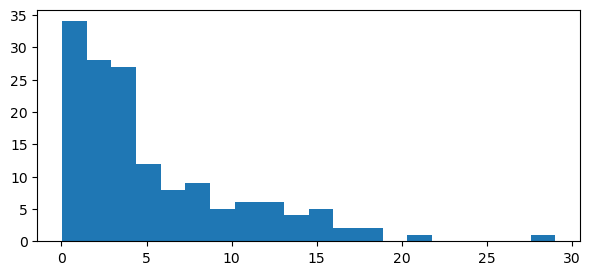

In [20]:
# Q1: What distribution might the time it takes to complete one widget follow?
# A: Exponential, but it helps to look at the hist too!
fig,axes = plt.subplots(figsize =(7,3))

axes.hist(times.reshape((-1)),bins=20)

In [21]:
# Q2: What value for the parameter might we estimate for this?
times.mean()

5.404866666666666

In [22]:
# Q3: What's the probability it takes longer than 10 minutes to complete a widget?
1 - stats.expon(scale = times.mean()).cdf(10) #beta

0.1572081741841448

In [23]:
# Q4: What's the probability it takes longer than 45 minutes to complete 5 widgets?
# have 1, thats exp, if 5, then that's gamma, with 5 as the alpha

1 - stats.gamma(a=5, scale=times.mean()).cdf(45)

0.0824360706706464

<a id='normal'></a>

## The Normal distribution

The Normal distribution is the most well known and most important distribution. **Many** real-world processes can be modeled using a Normal distribution.

Parameters of the Normal distribution:

- $\mu$ is the mean.
- $\sigma$ is the standard deviation of the distribution.

#### Normal pdf

Let $X \sim N(\mu, \sigma)$. The probability density function of the Normal distribution is given by

### $$ f(x) = \frac{1}{\sqrt{2\pi\sigma^2} } \; e^{ -\frac{(x-\mu)^2}{2\sigma^2} } $$

Let's say the average purchase from our website is \\$25 with a standard deviation of \\$5.

In [24]:
x = stats.norm(25,5)

In [26]:
print(f"The mean is {x.mean()}")
print(f"The standard dev is {x.std()}")

The mean is 25.0
The standard dev is 5.0


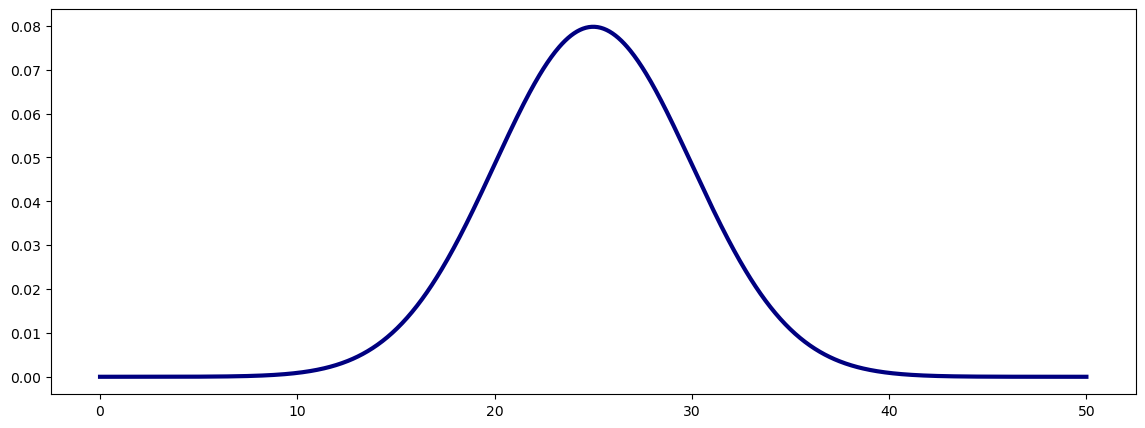

In [27]:
plot_distn(x,0,50)

#### Normal cdf

[The Normal cumulative distribution function has to be approximated.](https://en.wikipedia.org/wiki/Normal_distribution#Definition) If you want, see the Wikipedia page for the details on how it is calculated. 

We can plot it here, however, using SciPy.

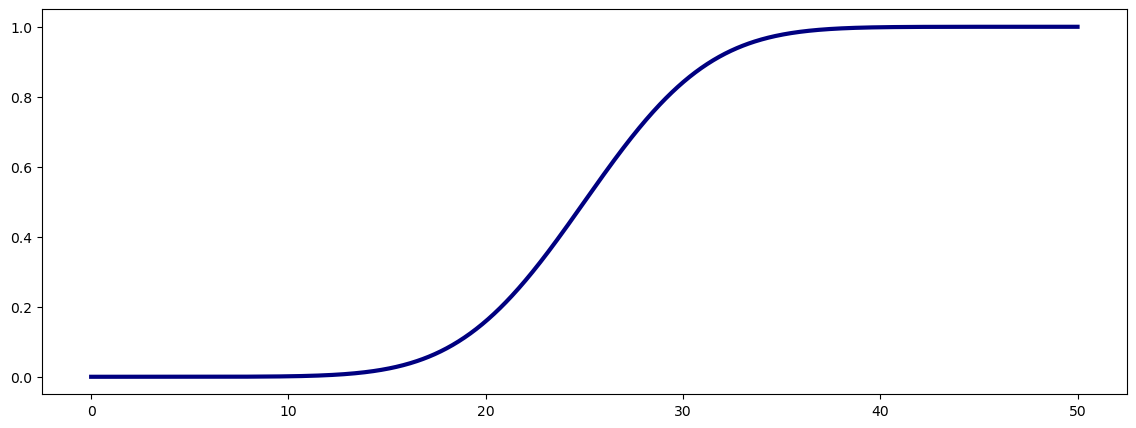

In [30]:
# cdfs all follow the same pattern, and so aren't *too* interesting.
plot_distn(x,0,50, kind="cdf")

## The Standard Normal distribution
An important building block in the world of statistics is the **standard normal distribution**. This is the $N(0, 1)$ distribution, and is traditionally abbreviated with a $Z$. Specifically, if $X \sim N(\mu, \sigma)$, then

$$ Z = \frac{X - \mu}{\sigma} \sim N(0, 1) $$

### Interview Question

Your company maintains a piece of chat software. An engineer mentions that there were ten support calls yesterday. The engineer wants to use a Normal distribution to predict the number of calls they can expect in a given day so they can figure out how many call technicians are needed.

<details><summary>What are some of the downsides to using a Normal distribution to predict the maximum number of calls in a day?</summary>

_(Answers may vary! This is not a complete list of all possible answers!)_
- The number of calls you can expect in a day is a discrete variable, but the Normal distribution is continuous.
- The number of calls in a day can't be negative, but the Normal distribution will include negative values!
- The Normal distribution is symmetric, but if we plotted the number of calls each day, there's a good chance it won't be symmetric.
</details>

## The Beta Distrubtion
Another distribution that we'll see more later in the class is the beta distribtion. This distribution is special because it can only take on values between 0 and 1. This makes it especially useful for modeling probabilities for Bayesian statistics. It's pretty wild, you can check out beta's [wiki page](https://en.wikipedia.org/wiki/Beta_distribution) for more details.

If we let $X \sim \text{Beta}(\alpha, \beta)$, then

$$ f(x) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} x^{\alpha - 1}(1 - x)^{\beta - 1} $$

Note that if $\alpha = \beta = 1$, then the $\text{Beta}(1, 1)$ distribution is exactly the same as the $U(0, 1)$ distribution!

In [31]:
# Let's make a beta random variable and check it out.
x = stats.beta(10,5)

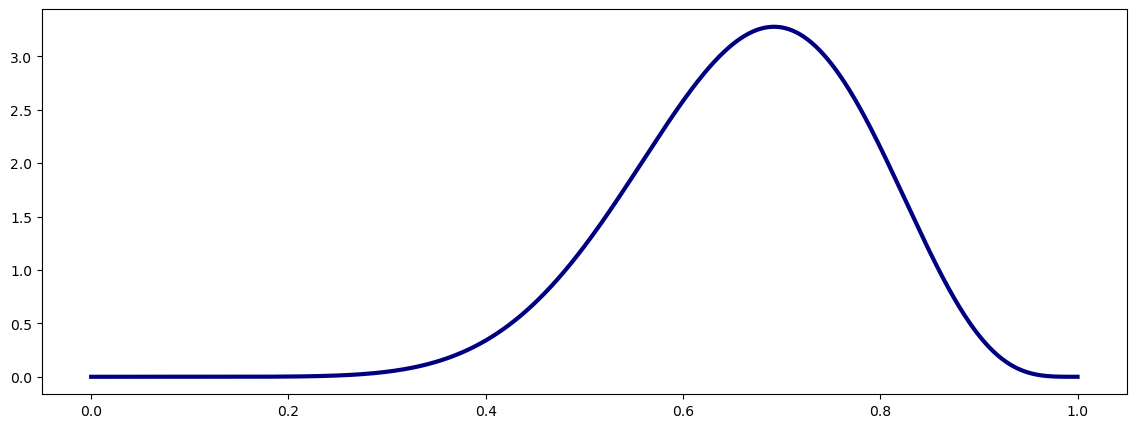

In [32]:
plot_distn(x,0,1)

### (BONUS) Summary Statistics

For these "named" distributions (distributions that have names), they have been studied well enough that we know some nice properties. 

For example:
- The mean of the Continuous Uniform distribution is exactly $\frac{b+a}{2}$.
- The mean of the Exponential distribution is exactly $\beta$.
- The mean of the Normal distribution is exactly $\mu$.
- The mean of the Binomial distribution is exactly $np$.
- The mean of the Poisson distribution is exactly $\lambda$.

The mean (or expected value) of a random variable $X$ is often denoted with an $E$. That is, if $X$ has a mean $\mu$, then $E[X] = \mu$. This notation will pop up as you study outside resources. Working with random variables often involves knowledge of **calculus**.

## Moving from Distributions to Data

It's sometimes nice to use pdfs and cdfs. They can help us answer many problems, like we've seen earlier.

<details><summary>However, in the real world, we might not have access to the pdf or the cdf. Why is that?</summary>
    
- We have to believe that our population perfectly follows a specific probability distribution. It's probably not often the case that our data does this.
- However, there's a really special and important result in statistics that connects data with a common probability distribution that we rely on a lot.
</details>

In [ ]:
data = np.load("./data/strange-data.npy")

### **This is the Central Limit Theorem at play!**

## Central Limit Theorem

The CLT is one of the most misunderstood theorems in all of statistics. In essence, it states:

Suppose you have a random variable $X$ that follows any (reasonable) distribution. Suppose you randomly sample from this distribution and compute its mean and write it down. Now do this many, many more times. **The distribution of these means will follow a normal distribution in the long run.**

Stated in pure math, if $X$ is a random variable with mean $\mu$ and standard deviation $\sigma$, then if each sample is taken to be of size $n$, and we let the number of these separate samples go to infinity,

$$ \frac{\bar{X} - \mu}{\sigma/\sqrt{n}} \longrightarrow N(0, 1) $$

**Because we often deal with averages (or sums) of things, the Central Limit Theorem causes the normal distribution to appear all over the place.** This is amazing! Normality is the most common assumption we'll make about the distribution of our data or our errors. We also rely heavily on the CLT when conducting hypothesis tests.

### Visualizing the Central Limit Theorem
Check out a fantastic resource [here](https://seeing-theory.brown.edu/probability-distributions/index.html#section3).

### Common Misunderstanding of the CLT

Many beginners will quote the CLT as saying "as long as we connect enough data, our data will look normal!" **THIS IS EXTREMELY FALSE AND I NEVER WANNA HEAR IT AGAIN!!!** In fact, this is the definition of a distribution! If we collect more and more data from a source, that distribution will converge to its true distribution.

## LEARNING OBJECTIVES
By the end of this lesson, students should be able to:
- Give examples of several continuous distributions: uniform, exponential, gamma, normal, standard normal, and beta.
- Understand how and why we can use distributional assumptions in our work.
- Describe why the normal distribution is seen everywhere.
- State the Central Limit Theorem.

<details><summary>What is the Continuous Uniform distribution?</summary>

- The Continuous Uniform distribution is a distribution that takes on an uncountable number of values with equal probability.
- An example of the Continuous Uniform might be to randomly generate a number between 0 and 1.
</details>

<details><summary>What is the Exponential distribution?</summary>

- Just like the Poisson distribution is the Binomial distribution taken to the limit, the Exponential distribution is the Geometric distribution taken to the limit. The Exponential distribution models the amount of time until an event occurs. Examples of the Exponential distribution might be:
    - The amount of time until a bus arrives at the stop.
    - The amount of time until a light bulb stops working.
    - The amount of time until a new visitor comes to my website.
</details>

<details><summary>What is the Normal distribution?</summary>

- The Normal distribution is the most widely-known distribution. It is symmetric, bell-shaped, and is parameterized by its mean and variance/standard deviation. Examples of the Normal distribution might be:
    - The intelligence quotient (IQ) of individuals.
    - The average values of 1,000 dice rolls.
</details>

<details><summary>Why is the Normal distribution seen everywhere?</summary>

- The Normal distribution naturally models a lot of real-world phenomena. However, the Normal distribution also models the average of **any** random variables, as long as there's enough. We often count or average things, so this will pop up frequently. In addition, some distributions naturally are means/sums of other random variables (Poisson, Binomial, and lots of others we haven't officially discussed) so we can use the Normal distribution in lots of cases!
</details>

<details><summary>State the Central Limit Theorem.</summary>

- The Central Limit Theorem states that, as $N \rightarrow \infty$ (where $N$ is the number of independent samples), the sampling distribution of $\bar{X}$ will approach a Normal distribution with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$.
</details>

### Resources
- The [Kolmogorov-Smirnov test](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html) is a way for us to estimate whether two samples come from the same distribution or whether one sample comes from a particular distribution. (This will make more sense after you've covered hypothesis testing in inference.)